### Problem Description

* We have a dataset containing actual transactions from 2010 and 2011 and we need to made some analysis on data to extract some useful information about customers and items like which country make the most transactions and which top customers 
* Dataset Link : https://www.kaggle.com/carrie1/ecommerce-data

## Packages

In [155]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)


from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge

### Read Dataset

In [156]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape

(541909, 8)

In [157]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## EDA

In [158]:
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [159]:
# Removing None Customer IDs ... save clean dataframe with same variable `df`
df = df[df['CustomerID'].notna()]

In [160]:
# Just for Checking 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Q1: Which Country makes the most transactions?

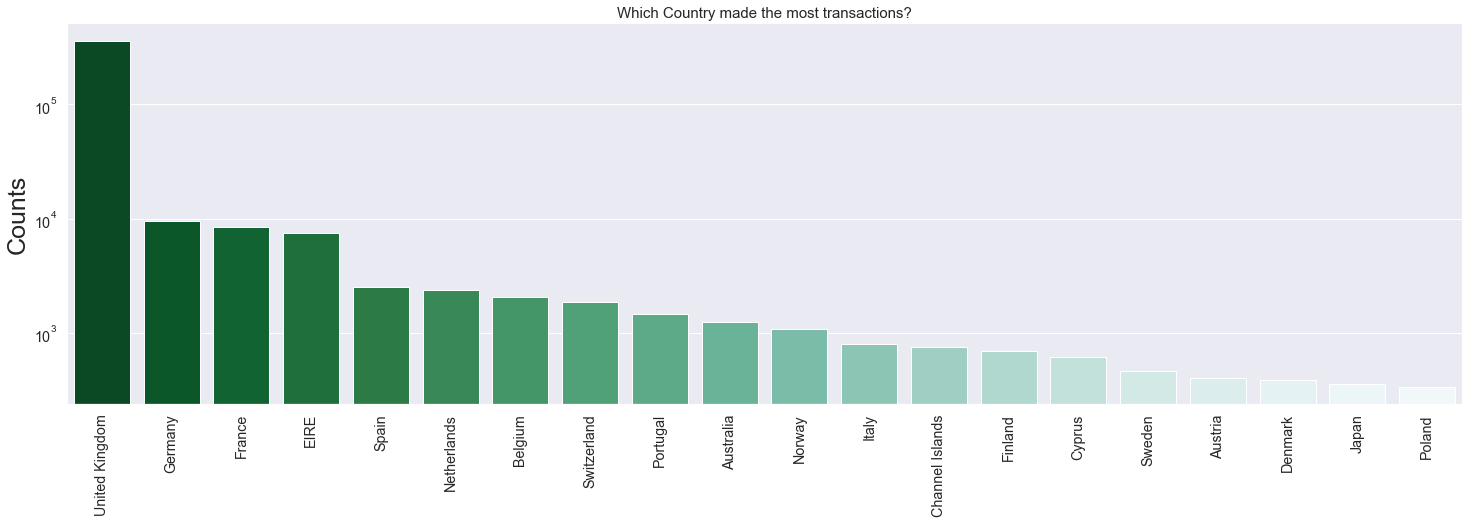

In [161]:
plt.figure(figsize = (25,7))
x=df.Country.value_counts()[:20].index
y=df.Country.value_counts()[:20].values
plt.title("Which Country made the most transactions?",size=15)
plt.ylabel("Counts",size=25)
plt.xticks(rotation=90)
sns.set(style="white", color_codes=True)
sns.barplot(x=x,y=y,palette="BuGn_r")
ax=plt.gca()
ax.set_yscale('log')

### Q2: Show the Top 10 Customers how made the largest Revenue
### Q6: Calculate the Total Revenue for each Row

In [162]:
df['Revenue'] = df['Quantity']*df['UnitPrice']
df_top_10 = df.groupby(by=['CustomerID'])['Revenue'].sum().reset_index().sort_values('Revenue',ascending=False)
df_top_10.reset_index(drop=True,inplace=True)
df_top_10.head(10)

,CustomerID,Revenue
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
5,14156,113384.14
6,17511,88125.38
7,16684,65892.08
8,13694,62653.10
9,15311,59419.34


### Q3: Show Top 5 frequent Customers

In [163]:
df_top_cust = df[['CustomerID', 'InvoiceNo']].groupby('CustomerID').count().reset_index().sort_values('InvoiceNo',ascending=False)
df_top_cust.rename(columns = {'InvoiceNo': 'Frequency'}, inplace = True)
df_top_cust.reset_index(drop=True,inplace=True)
df_top_cust.head()

,CustomerID,Frequency
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


In [164]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

In [165]:
d1= {'DescriptionLength':df["Description"].str.len()}
df2 = pd.DataFrame(data=d1)

<AxesSubplot:xlabel='DescriptionLength', ylabel='Count'>

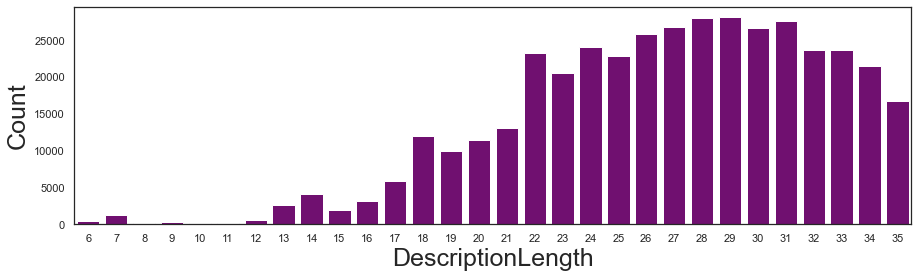

In [166]:
plt.figure(figsize = (15,4))
x=df2.DescriptionLength.value_counts()[:34].index
y=df2.DescriptionLength.value_counts()[:34].values
plt.ylabel('Count',size=25)
plt.xlabel('DescriptionLength',size=25)
sns.barplot(x=x,y=y,color='purple')

### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature
P.S: Date is based on Year, Month & Day features

In [167]:
df["Year"] = df['InvoiceDate'].dt.year
df["Quarter"] = df['InvoiceDate'].dt.quarter
df["Month"] = df['InvoiceDate'].dt.month
df["Week"] = df['InvoiceDate'].dt.isocalendar().week
df["Weekday"] = df['InvoiceDate'].dt.weekday
df["Day"] = df['InvoiceDate'].dt.day
df["Dayofyear"] = df['InvoiceDate'].dt.dayofyear
df["Date"] = df['InvoiceDate'].dt.date

In [168]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [175]:
grouped_features = ['Date','Year','Quarter','Month','Week','Weekday','Dayofyear','Day','StockCode']

In [176]:
df.groupby(grouped_features,as_index=False)[['Quantity','Revenue']].sum().head()

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,10002,60,51.00
1,2010-12-01,2010,4,12,48,2,335,1,10125,2,1.70
2,2010-12-01,2010,4,12,48,2,335,1,10133,5,4.25
3,2010-12-01,2010,4,12,48,2,335,1,15044B,1,2.95
4,2010-12-01,2010,4,12,48,2,335,1,15056BL,20,113.00


## (Optional Part)
#### You Can go on with the Modelling part using any type of 
  - ML model 
  - features pre-processing 
  - Loss function

as mentioned in the Questions

### Modelling

# Great Job
### Now go through the Food Review Notebook